MLG Assignment 2

Tokelo Jr Qhena (578478)
Rotondwa Nemasetoni (578461)
Riziky Joyce (578695)
Chanelle Van Staden (578509)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor




Import Data

In [2]:

dataframe = pd.read_csv('train.csv')
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preparation

In [3]:
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
dataframe.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
dataframe['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
def show_missing_info(df):
    missing_info = df.isna().sum().reset_index(drop=False)
    missing_info.columns = ["column","rows"]
    missing_info["missing_pct"] = (missing_info["rows"]/df.shape[0])*100
    missing_info = missing_info[missing_info["rows"]>0].sort_values(by="missing_pct",ascending=False)
    return missing_info
missing_df = show_missing_info(dataframe)
missing_df


,column,rows,missing_pct
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945
63,GarageQual,81,5.547945


In [8]:
dataframe.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

## Spliting numeric and categorical columns

In [9]:

object_columns_df = dataframe.select_dtypes(include=['object'])
numerical_columns_df =dataframe.select_dtypes(exclude=['object'])

In [10]:
object_columns_df.isna().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [11]:
object_columns_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


### Filling categorical column with most frequent values

In [12]:

for column in object_columns_df.columns:
    lbl = LabelEncoder()
    lbl.fit(list(object_columns_df[column].values))

In [13]:
numerical_columns_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Filliling the numerical column with mean

In [14]:

numerical_columns_df = numerical_columns_df.fillna(numerical_columns_df.mean())
numerical_columns_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [15]:
object_columns_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


One Hot Encoding

In [16]:

object_columns_df = pd.get_dummies(object_columns_df)

## Combining both numerical and categorical dataframes

In [17]:

df_final = pd.concat([numerical_columns_df, object_columns_df], axis=1)

# Feature Engineering

C:\Users\Chanelle\AppData\Local\Temp\ipykernel_19988\3219016438.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataframe.corr()


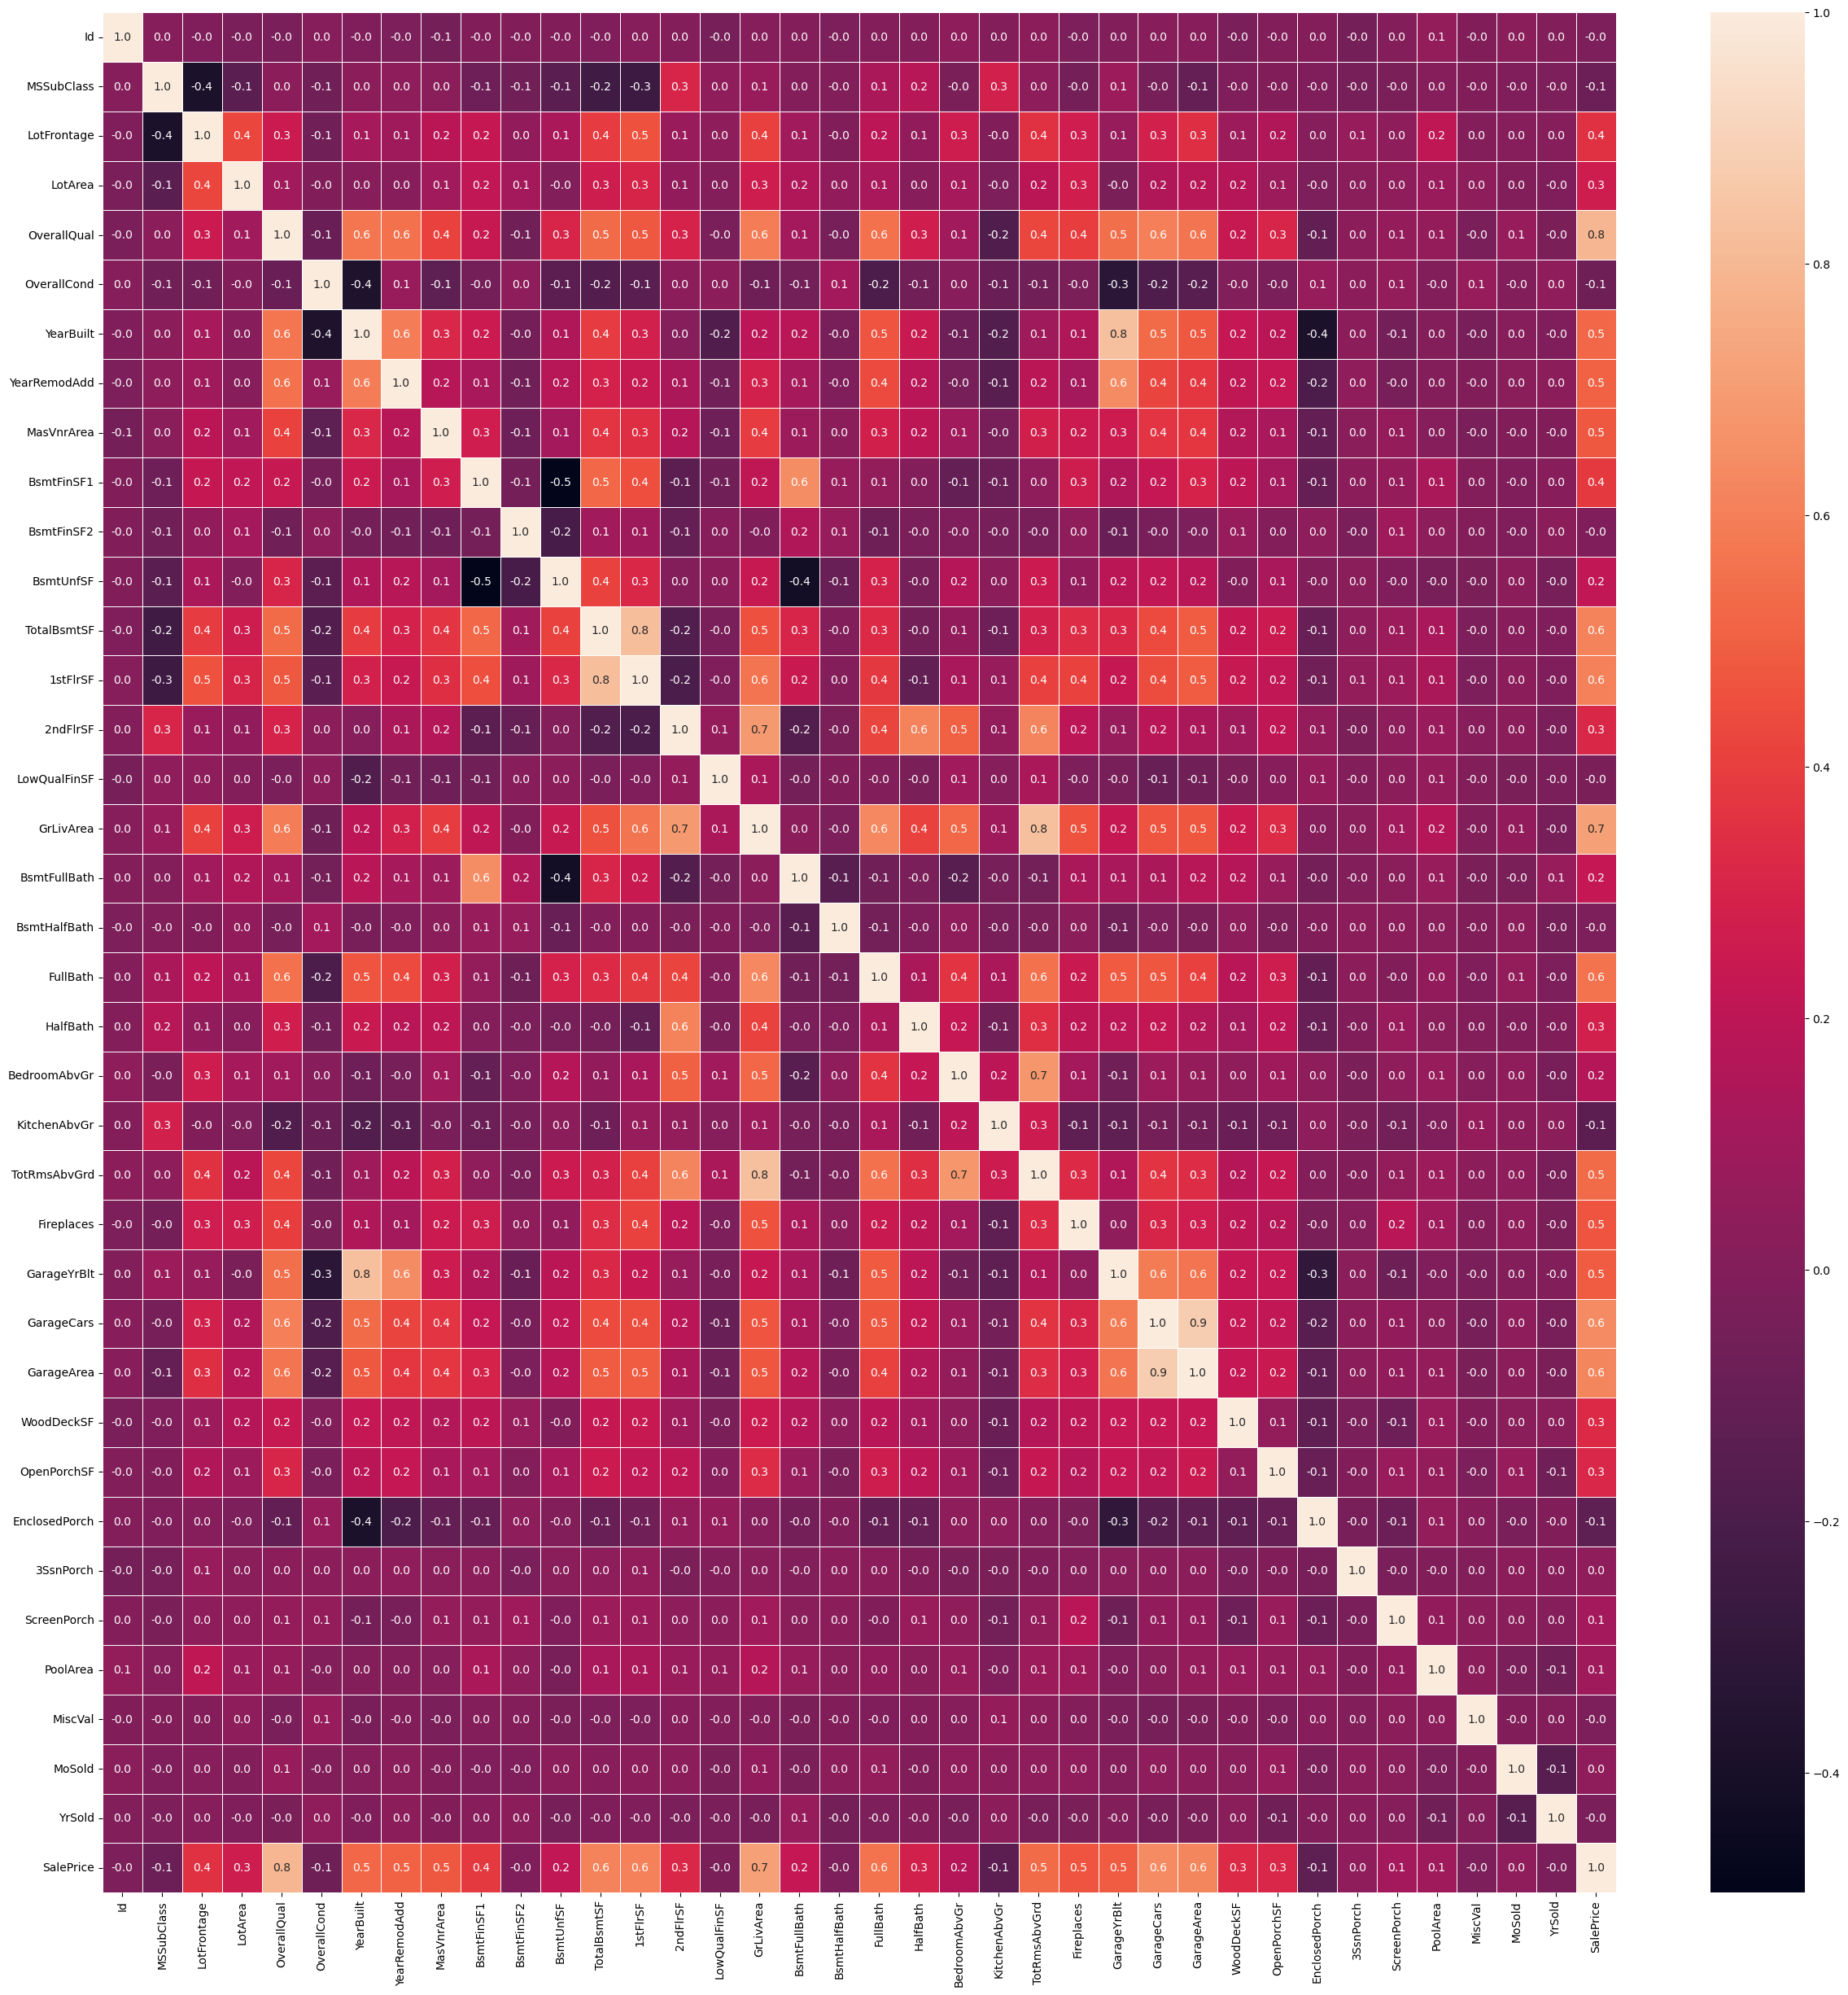

In [18]:
correlation = dataframe.corr()
f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlation, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

(array([6., 6., 3., 5., 4., 6., 5., 1., 1., 1.]),
 array([-0.13590737, -0.02231663,  0.0912741 ,  0.20486484,  0.31845558,
         0.43204631,  0.54563705,  0.65922779,  0.77281853,  0.88640926,
         1.        ]),
 <BarContainer object of 10 artists>)

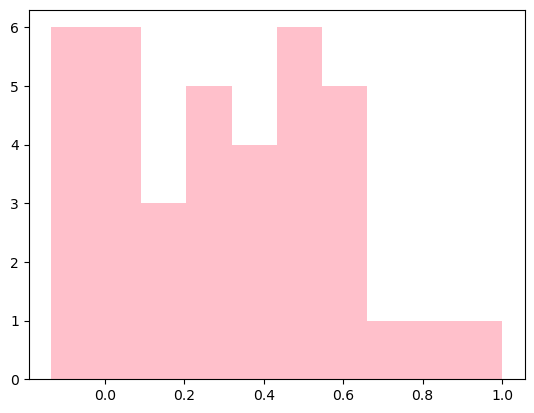

In [19]:
correlation["SalePrice"].sort_values(ascending=False)
plt.hist(correlation["SalePrice"],color = 'pink')


Age of the house is correlated to the sale price of the house therefore age of house feature must be made

In [20]:

df_final["Age"] = df_final["YrSold"] - df_final["YearBuilt"]

In [21]:
df_final = df_final.drop(['YearBuilt', 'YrSold'], axis=1)
df_final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,5
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,31
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,7
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,91
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,8


Droping Columns with negative correlation

In [22]:

drop_list3=['OverallCond','EnclosedPorch', 'KitchenAbvGr','MSSubClass','OverallCond','LowQualFinSF','MiscVal','BsmtFinSF2','BsmtHalfBath']

df_final = df_final.drop(drop_list3, axis=1)

The distribution of SalePrice

C:\Users\Chanelle\AppData\Local\Temp\ipykernel_19988\4116716165.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

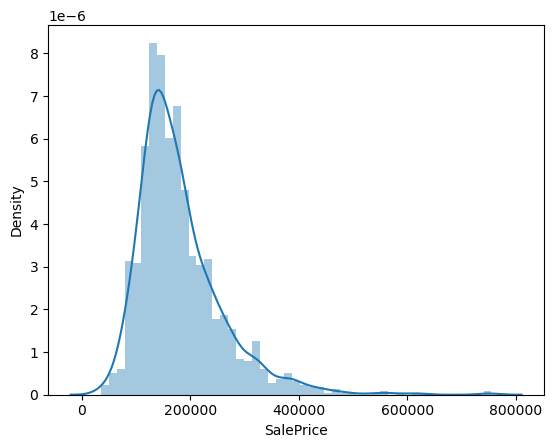

In [23]:

sns.distplot(df_final["SalePrice"])

In [24]:
df_final.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
YearRemodAdd             0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Age                      0
Length: 268, dtype: int64

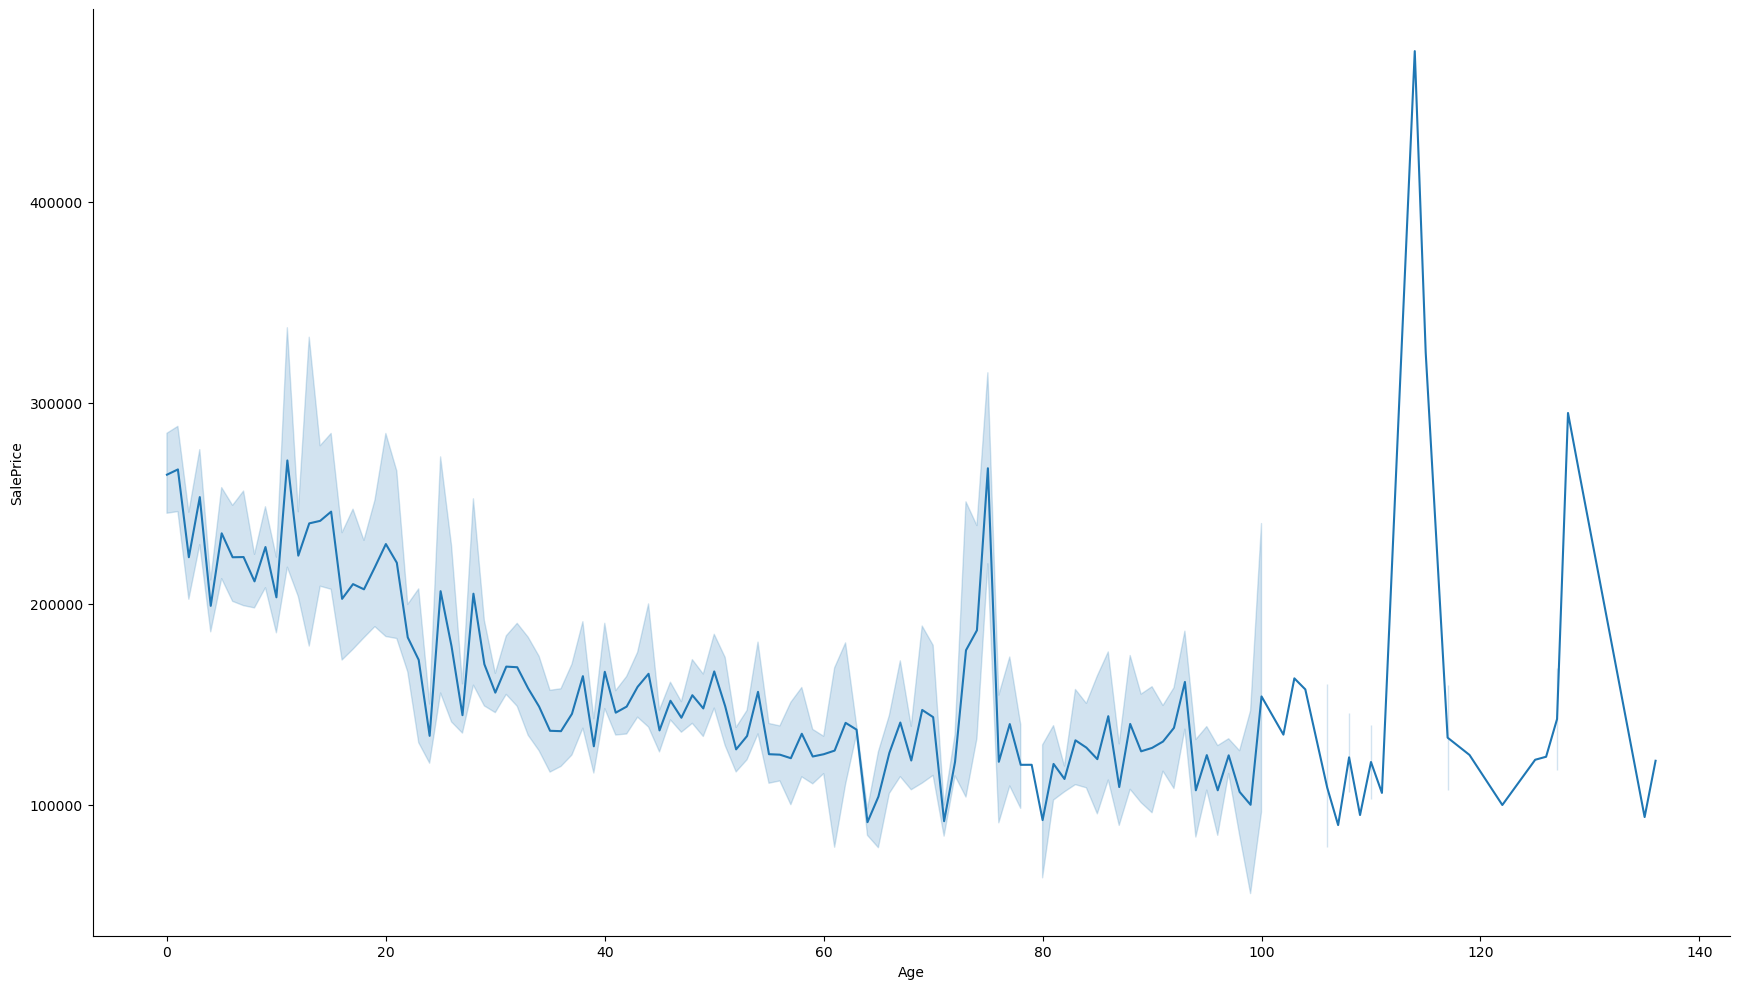

In [25]:
sns.relplot(x="Age", y="SalePrice",
            size_order=["T1", "T2"],
            height=10, aspect=1.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=df_final)

# Model Setup

Spliting data into train and test

In [26]:

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
X_train_id = X_train['Id']
X_train.drop(['Id'], axis=1, inplace=True)


## Random Forest Model

### Train Data

In [28]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)
predictions = model.predict(X_train)
print(predictions)



[144117.9956153  176534.83097169 108231.32468578 ... 125721.64722631
 158833.12798661 204485.64530492]


In [29]:
print("coefficient of determination (Random Forest Model:Train):",r2_score(Y_train, predictions))

coefficient of determination (Random Forest Model:Train): 0.9094761579218525


### Test Data Random Forest

In [30]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_test,Y_test)
Test_predictions = model.predict(X_test)
Test_r2 = r2_score(Y_test,Test_predictions)
print(Test_predictions)
print('coefficient of determination (Random Forest Model:Test):',Test_r2)

[140180.43953239 314820.64122856 111903.62890381 146343.39339862
 324009.04882851  87561.47615491 269352.11794764 153205.01643764
  87151.63574453 136352.0555769  165883.61629491 130303.08636682
 125607.43662211 232585.03291669 167816.03358609 132801.1970728
 190328.44632534 133115.28292402 111928.69542946 220459.44057133
 163120.55258401 207955.97641101 170800.67044482 128278.86475959
 198350.21974939 157766.03073037 194197.46017438 117070.1871388
 165379.04402102 196126.62300035 121479.23988778 283894.33419526
 183367.92255852 125600.85435296 272171.70974124 141636.09409025
 140192.68173403 212418.1400908  309532.28035436  97960.8964327
 122215.67794786 234324.11814252 128805.04724458 318596.22168959
 134130.15855751 142625.31884133 125386.18940598 132290.92873126
 423484.75899685 139684.6512046  130033.22872018 178860.61415457
 122988.83997359 301085.29435396 143866.89507297 254037.25627963
 209044.99873661 150890.53555159 133331.84071148 100754.46724467
  75876.98327878 143061.4053

## Linear Regression Model

### Train Data

In [31]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, Y_train)
lnr_prediction = model.predict(X_train)
r_sq = model.score(X_train, Y_train) 
print('coefficient of determination(Linear Regression):', r_sq)
print('intercept:', model.intercept_)

 

print('slope:', model.coef_)



coefficient of determination(Linear Regression): 0.9320745593645868
intercept: -468832.7061196129
slope: [ 8.84626862e+00  6.69799157e-01  7.74414778e+03  2.49559191e+02
  1.92574312e+01  1.41117867e+01 -5.07628842e+00  2.58707832e+01
  2.95901716e+01  4.71680682e+01  1.24070982e+01  8.38065306e+02
  1.88073959e+03  9.73462574e+02 -1.81203524e+03  7.10794946e+02
  6.18319453e+03 -7.92041179e+01  1.13253684e+03  3.17700577e+01
  1.82883229e+01  2.83614083e+00  4.94739072e+01  2.62271939e+01
  7.42086393e+01 -4.72429389e+02 -2.43367180e+04  1.24407961e+04
  2.10986609e+03  3.93741441e+03  5.84864141e+03 -1.06956248e+04
  1.06956248e+04 -3.41975692e+03  2.79210900e+03  2.86213241e+03
 -2.23448449e+03 -2.10203238e+03  1.12594845e+04 -1.10903424e+04
  1.93289034e+03  1.10269991e+04 -1.10269991e+04  3.95856817e+03
  1.41602149e+04 -4.15112401e+03 -1.72559431e+04  3.28828404e+03
  1.27476242e+04  1.77970370e+04 -3.05446613e+04  1.12678844e+04
 -3.80063609e+03 -4.93244497e+03 -1.41100037e+03 -

### Test Data

## Final Predicted Prices

In [32]:
df_Prices = pd.DataFrame({ 'Actual': Y_train, 'RF_Predicted': predictions, 'LNR_Predicted': lnr_prediction})

df_Prices

,Actual,RF_Predicted,LNR_Predicted
254,145000,144117.995615,148169.569677
1066,178000,176534.830972,159701.163727
638,85000,108231.324686,88683.476781
799,175000,155553.628811,161614.414661
380,127000,145454.158841,166643.661463
...,...,...,...
1095,176432,171068.737273,164234.655643
1130,135000,162317.197702,161235.806353
1294,115000,125721.647226,113367.925390
860,189950,158833.127987,169552.197500
